# Fine tuning for Math U See blocks

## Basic setup

There isn't too much to do to get started - just a few simple configuration steps.

This shows plots in the web page itself - we always wants to use this when using jupyter notebook:

In [2]:
%matplotlib inline

In [3]:
path = "/srv/"
model_name = "mus_vgg_ft.h5"
#path = "data/dogscats/sample/"

A few basic libraries that we'll need for the initial exercises:

In [4]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

We have created a file most imaginatively called 'utils.py' to store any little convenience functions we'll want to use. We will discuss these as we use them.

In [5]:
import utils; reload(utils)
from utils import plots

Using TensorFlow backend.


# Use a pretrained VGG model with our **Vgg16** class

In [6]:
# As large as you can, but no larger than 64 is recommended. 
# If you have an older or cheaper GPU, you'll run out of memory, so will have to decrease this.
batch_size=8

In [7]:
# Import our class, and instantiate
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [8]:
vgg = Vgg16()
# Grab a few images at a time for training and validation.
# NB: They must be in subdirectories named based on their category
batches = vgg.get_batches(path+'training', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

Found 633 images belonging to 2 classes.
Found 88 images belonging to 2 classes.
Epoch 1/1
633/633 [==============================] - 1597s - loss: 0.2894 - acc: 0.8863 - val_loss: 0.0180 - val_acc: 1.0000

### Saving the architecture + weights of my model

In [9]:
vgg.model.save(path +'mus_vgg_ft_1.h5')

## Validate the model

In [11]:
from keras.preprocessing import image

In [12]:
def get_batches(dirname, gen=image.ImageDataGenerator(), shuffle=True, 
                batch_size=batch_size, class_mode='categorical'):
    return gen.flow_from_directory(path+dirname, target_size=(224,224), 
                class_mode=class_mode, shuffle=shuffle, batch_size=batch_size)

In [13]:
batches = get_batches('training', batch_size=batch_size)
val_batches = get_batches('valid', batch_size=batch_size)
imgs,labels = next(batches)

Found 633 images belonging to 2 classes.
Found 88 images belonging to 2 classes.


In [22]:
def pred_batch(model_in, imgs):
    preds = model_in.predict(imgs)
    idxs = np.argmax(preds, axis=1)
    classes = ["one", "ten"]

    print('Shape: {}'.format(preds.shape))
    print('First 2 probabilities: {}\n'.format(preds[0, :5]))
    print('Predictions prob/class: ')
    
    for i in range(len(idxs)):
        idx = idxs[i]
        print ('  {:.4f}/{}'.format(preds[i, idx], classes[idx]))

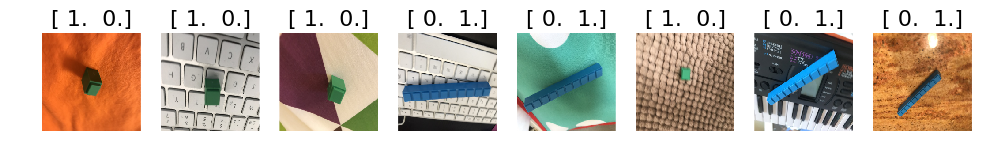

In [23]:
plots(imgs, titles=labels)

In [24]:
pred_batch(vgg.model, imgs)

Shape: (8, 2)
First 2 probabilities: [  1.0000e+00   5.0148e-08]

Predictions prob/class: 
  1.0000/one
  0.9739/one
  1.0000/one
  0.7079/ten
  0.9983/ten
  1.0000/one
  0.9998/ten
  1.0000/ten


In [25]:
len(imgs)

8